In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/adityametkar/Downloads/owid_co2_dataset.csv") # Reading CSV file
df

,country,year,population,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,land_use_change_co2,methane,nitrous_oxide,oil_co2,primary_energy_consumption,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg
0,Afghanistan,1975,12773966.0,0.069417,2.121383,0.398689,NaN,NaN,0.303589,0.475500,3.586433,9.779097,3.425106,0.874189,NaN,0.000318,0.000452,0.000831,0.000062,20.737389
1,Afghanistan,1976,13059861.0,0.079243,1.980859,0.425024,NaN,NaN,0.293120,0.300448,3.288404,9.955831,3.523973,0.883024,NaN,0.000322,0.000455,0.000840,0.000064,20.578440
2,Afghanistan,1977,13340758.0,0.064863,2.384175,0.450672,NaN,NaN,0.381056,0.512960,2.998105,9.767192,3.459198,0.974624,NaN,0.000325,0.000458,0.000848,0.000065,20.478312
3,Afghanistan,1978,13611444.0,0.057598,2.153300,0.576226,NaN,NaN,0.282608,0.300959,2.626868,9.773578,3.405809,0.935909,NaN,0.000328,0.000461,0.000855,0.000067,19.845734
4,Afghanistan,1979,13655575.0,0.063666,2.232754,0.351744,NaN,NaN,0.267472,0.384720,2.753972,9.587070,3.307477,1.165152,NaN,0.000330,0.000464,0.000862,0.000068,19.589954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,Zimbabwe,2020,15526887.0,0.495991,8.490839,4.931744,2163.068359,1.448990,0.000000,NaN,-0.593495,11.314008,4.591433,3.063104,33.585716,0.000526,0.000972,0.001669,0.000171,24.145832
10896,Zimbabwe,2021,15797220.0,0.542490,10.222778,5.935680,2382.434326,1.497045,0.000000,NaN,2.221227,11.840276,4.857637,3.744608,37.635838,0.000527,0.000977,0.001677,0.000173,27.906528
10897,Zimbabwe,2022,16069061.0,0.387493,12.231845,7.165461,3633.067383,2.253915,0.000000,NaN,-0.338297,12.642957,5.201800,4.678891,58.379982,0.000531,0.000982,0.001689,0.000176,29.916828
10898,Zimbabwe,2023,16340829.0,0.387493,13.443295,8.284867,3181.361084,NaN,0.000000,NaN,-1.310063,12.999134,5.245372,4.770935,51.986076,0.000536,0.000988,0.001703,0.000178,31.028685


## Data Overview and Assumptions

The dataset contains country-level emissions data for CO₂ and total greenhouse gases.  
Missing values are treated as factual (non-reporting) and are not imputed.

In [3]:
df.info() # Dataset Information and Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      10900 non-null  object 
 1   year                         10900 non-null  int64  
 2   population                   10800 non-null  float64
 3   cement_co2                   10252 non-null  float64
 4   co2                          10529 non-null  float64
 5   coal_co2                     6959 non-null   float64
 6   energy_per_capita            9079 non-null   float64
 7   energy_per_gdp               7129 non-null   float64
 8   flaring_co2                  8135 non-null   float64
 9   gas_co2                      5770 non-null   float64
 10  land_use_change_co2          9850 non-null   float64
 11  methane                      9950 non-null   float64
 12  nitrous_oxide                10050 non-null  float64
 13  oil_co2         

In [4]:
df.describe() # Statistical summary of numeric features

,year,population,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,land_use_change_co2,methane,nitrous_oxide,oil_co2,primary_energy_consumption,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg
count,10900.000000,1.080000e+04,10252.000000,10529.000000,6959.000000,9079.000000,7129.000000,8135.000000,5770.000000,9850.000000,9950.000000,10050.000000,10453.000000,9123.000000,10050.000000,10750.000000,10750.000000,10050.000000,9950.000000
mean,1999.500000,2.833078e+07,4.287255,125.277232,76.348435,24023.975822,1.637120,1.982474,42.327500,34.226789,38.857243,12.112363,44.898642,618.657515,0.001456,0.003809,0.005434,0.000282,213.815756
std,14.431532,1.155277e+08,32.047758,609.063790,441.212631,33281.448016,1.648741,6.356299,137.989089,151.131830,117.175612,37.579005,182.468098,2648.551359,0.004328,0.015689,0.020267,0.000870,799.502991
min,1975.000000,5.010000e+02,0.000000,0.000000,0.000000,0.000000,0.078366,0.000000,0.000000,-319.417542,0.001067,0.000000,0.000000,0.000000,-0.000798,-0.000067,-0.000272,0.000000,-3.526342
25%,1987.000000,5.806690e+05,0.000000,0.714480,0.047632,2464.651978,0.738120,0.000000,0.765567,-0.013694,1.529269,0.363641,0.633872,4.600940,0.000047,0.000048,0.000101,0.000008,7.487529
50%,1999.500000,5.052908e+06,0.264175,6.637128,1.652426,10878.413086,1.205741,0.000043,6.061544,1.860011,8.810755,2.728828,3.771447,39.741703,0.000306,0.000516,0.000922,0.000060,40.307135
75%,2012.000000,1.706064e+07,1.652570,49.158951,17.736904,33389.644531,1.995963,0.893480,29.781983,17.781200,25.277995,8.980229,23.750956,302.263428,0.000965,0.001866,0.002955,0.000203,114.015530
max,2024.000000,1.450936e+09,828.710022,12289.037109,8886.020508,318559.687500,25.252504,84.519539,1748.137695,2998.516357,1590.674072,475.533539,2584.129883,48987.101562,0.052508,0.246917,0.296246,0.011273,14107.006836


In [5]:
df.isnull().mean().round(2) * 100 # Missing value percentage for each feature

country                         0.0
year                            0.0
population                      1.0
cement_co2                      6.0
co2                             3.0
coal_co2                       36.0
energy_per_capita              17.0
energy_per_gdp                 35.0
flaring_co2                    25.0
gas_co2                        47.0
land_use_change_co2            10.0
methane                         9.0
nitrous_oxide                   8.0
oil_co2                         4.0
primary_energy_consumption     16.0
temperature_change_from_ch4     8.0
temperature_change_from_co2     1.0
temperature_change_from_ghg     1.0
temperature_change_from_n2o     8.0
total_ghg                       9.0
dtype: float64

In [6]:
numeric_cols = df.columns.drop("country")

df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)

In [7]:
# CO₂ analysis dataset
df_co2 = df[df["co2"].notna()].copy()

# Total GHG analysis dataset
df_ghg = df[df["total_ghg"].notna()].copy()

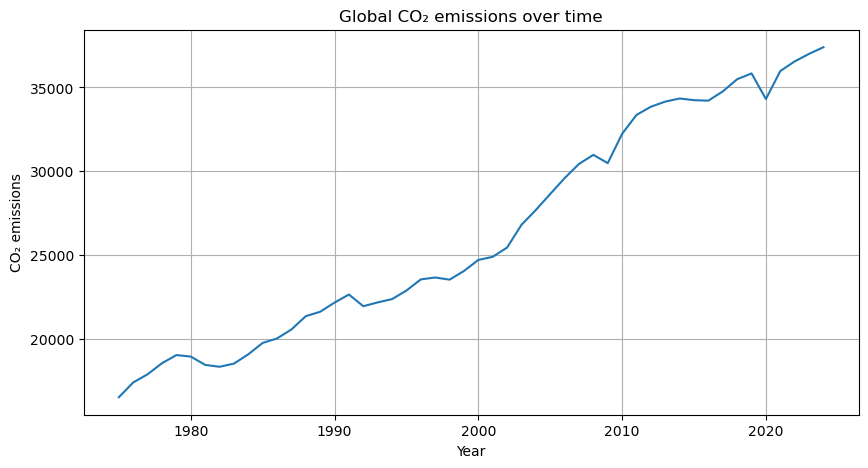

In [8]:
global_co2 = (
    df.groupby("year")["co2"]
      .sum(min_count=1)
)

plt.figure(figsize=(10, 5))
global_co2.plot()

plt.title("Global CO₂ emissions over time")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions")
plt.grid(True)
plt.show()

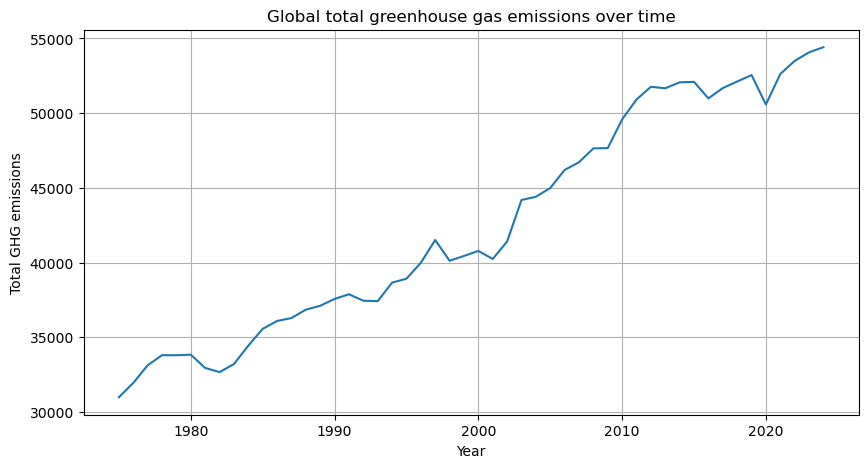

In [9]:
global_ghg = (
    df.groupby("year")["total_ghg"]
      .sum(min_count=1)
)

plt.figure(figsize=(10, 5))
global_ghg.plot()

plt.title("Global total greenhouse gas emissions over time")
plt.xlabel("Year")
plt.ylabel("Total GHG emissions")
plt.grid(True)
plt.show()

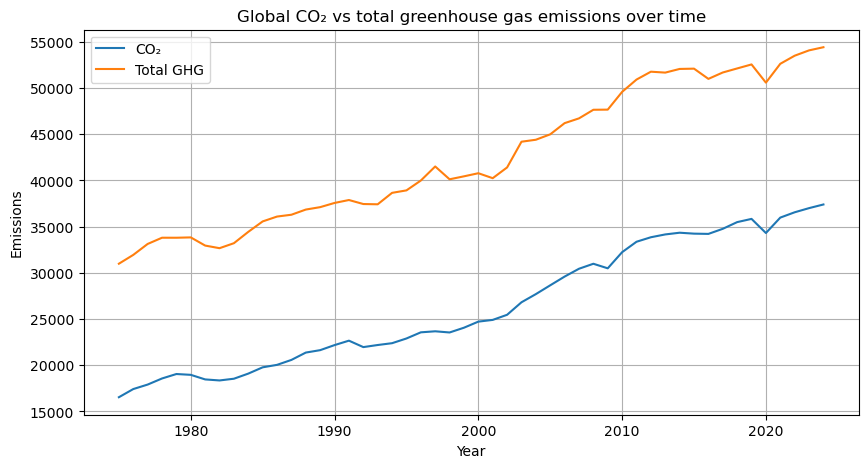

In [10]:
plt.figure(figsize=(10, 5))

global_co2.plot(label="CO₂")
global_ghg.plot(label="Total GHG")

plt.title("Global CO₂ vs total greenhouse gas emissions over time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend()
plt.grid(True)
plt.show()

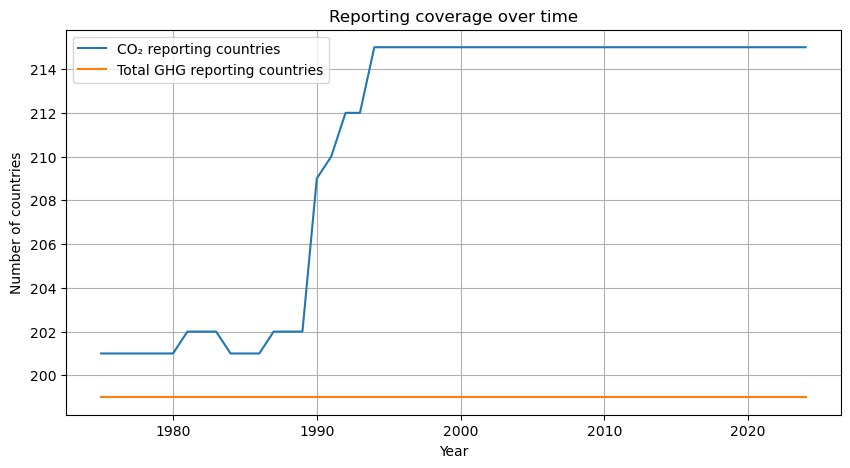

In [11]:
co2_coverage = (
    df["co2"].notna()
      .groupby(df["year"])
      .sum()
)

ghg_coverage = (
    df["total_ghg"].notna()
      .groupby(df["year"])
      .sum()
)

plt.figure(figsize=(10, 5))

co2_coverage.plot(label="CO₂ reporting countries")
ghg_coverage.plot(label="Total GHG reporting countries")

plt.title("Reporting coverage over time")
plt.xlabel("Year")
plt.ylabel("Number of countries")
plt.legend()
plt.grid(True)
plt.show()

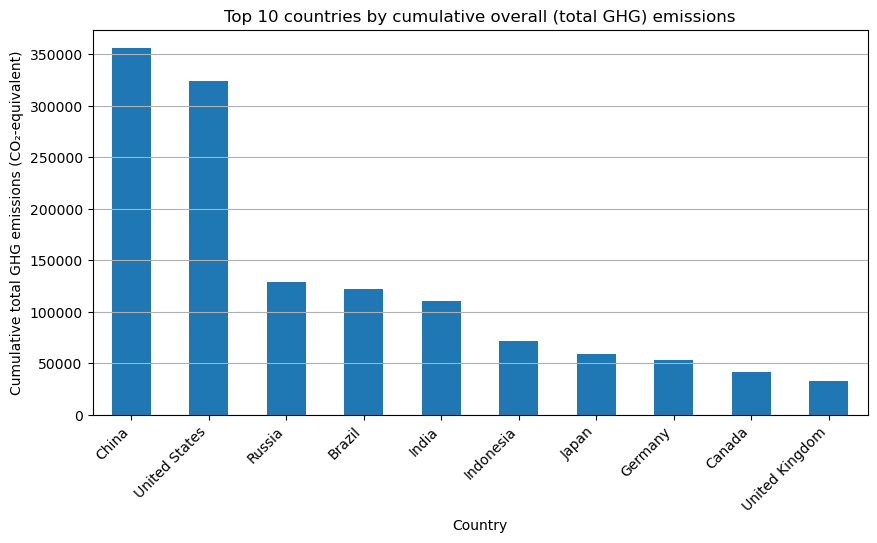

In [12]:
top10_overall = (
    df_ghg.groupby("country")["total_ghg"]
      .sum(min_count=1)
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
top10_overall.plot(kind="bar")

plt.title("Top 10 countries by cumulative overall (total GHG) emissions")
plt.xlabel("Country")
plt.ylabel("Cumulative total GHG emissions (CO₂-equivalent)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()

In [13]:
total_years = df["year"].nunique()
min_years = int(0.8 * total_years)  # ≥80% coverage
min_years

eligible_countries = (
    df.groupby("country")["total_ghg"]
      .apply(lambda x: x.notna().sum())
)

eligible_countries = eligible_countries[
    eligible_countries >= min_years
].index

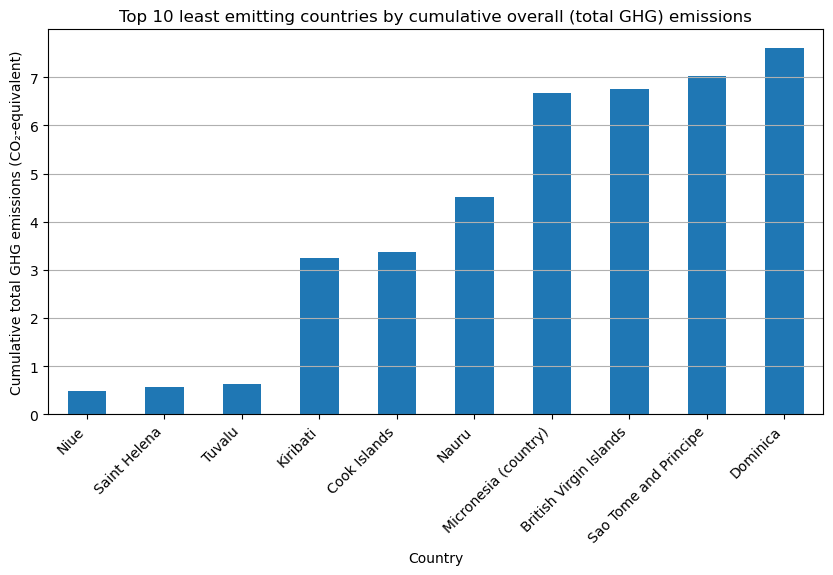

In [14]:
least10_overall = (
    df[df["country"].isin(eligible_countries)]
    .groupby("country")["total_ghg"]
    .sum(min_count=1)
    .sort_values()
    .head(10)
)

plt.figure(figsize=(10, 5))
least10_overall.plot(kind="bar")

plt.title("Top 10 least emitting countries by cumulative overall (total GHG) emissions")
plt.xlabel("Country")
plt.ylabel("Cumulative total GHG emissions (CO₂-equivalent)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()

In [15]:
df_sources = df[df["year"] >= 1990]

source_totals = {
    "Coal": df_sources["coal_co2"].sum(min_count=1),
    "Oil": df_sources["oil_co2"].sum(min_count=1),
    "Gas": df_sources["gas_co2"].sum(min_count=1),
    "Cement": df_sources["cement_co2"].sum(min_count=1),
    "Flaring": df_sources["flaring_co2"].sum(min_count=1),
}

source_totals = pd.Series(source_totals).sort_values(ascending=False)
source_totals

Coal       420909.435725
Oil        346917.675356
Gas        201659.532530
Cement      37732.017381
Flaring     12223.880224
dtype: float64

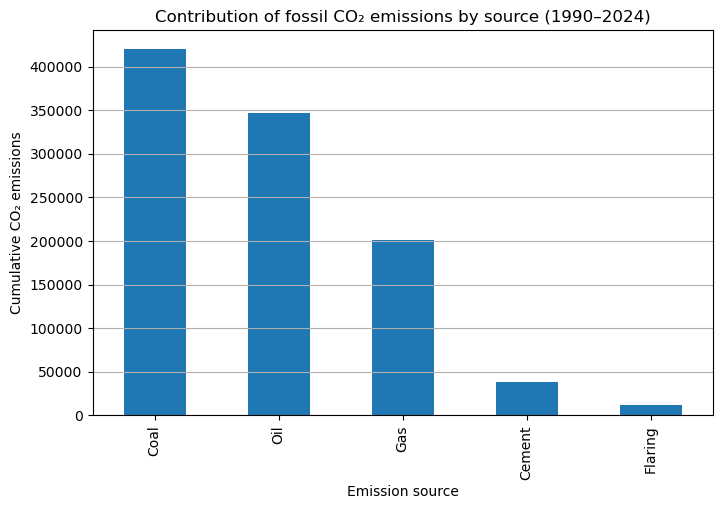

In [16]:
plt.figure(figsize=(8, 5))
source_totals.plot(kind="bar")

plt.title("Contribution of fossil CO₂ emissions by source (1990–2024)")
plt.ylabel("Cumulative CO₂ emissions")
plt.xlabel("Emission source")
plt.grid(axis="y")
plt.show()

## Methodology

Time-series forecasting is conducted using ARIMA models.  
A naive last-value forecast is used as a baseline for comparison.  
A 5-year holdout period is applied for model validation.

In [18]:
# ARIMA Modeling [Time-series forcasting]

# Global CO2 Modeling

global_co2 = (
    df.groupby("year")["co2"]
      .sum(min_count=1)
      .sort_index()
)

global_co2.index = pd.PeriodIndex(global_co2.index, freq="Y")

print(global_co2.head())
print(global_co2.tail())
print(global_co2.isna().sum())

year
1975    16543.439646
1976    17426.335914
1977    17911.927699
1978    18571.520955
1979    19053.732147
Freq: Y-DEC, Name: co2, dtype: float64
year
2020    34310.227663
2021    35978.964779
2022    36553.533080
2023    37003.069893
2024    37398.064426
Freq: Y-DEC, Name: co2, dtype: float64
0


In [19]:
train = global_co2.iloc[:-5]
test  = global_co2.iloc[-5:]

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

naive_forecast = np.repeat(train.iloc[-1], len(test))

mae_naive = mean_absolute_error(test, naive_forecast)

mse_naive = mean_squared_error(test, naive_forecast)
rmse_naive = mse_naive ** 0.5

mae_naive, rmse_naive

(1021.5168157817795, 1153.6589676507663)

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit ARIMA
model = ARIMA(train, order=(1, 1, 1))
fit = model.fit()

# Forecast on test set
forecast = fit.forecast(steps=len(test))
forecast.index = test.index  # align index

global_co2_fit = fit

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                   45
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -333.730
Date:                Thu, 05 Feb 2026   AIC                            673.461
Time:                        22:11:23   BIC                            678.813
Sample:                    12-31-1975   HQIC                           675.446
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.006    178.778      0.000       0.989       1.011
ma.L1         -0.9959      0.186     -5.354      0.000      -1.360      -0.631
sigma2      2.213e+05   8.09e-07   2.74e+11      0.000    2.21e+05    2.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.23   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.07   Prob(JB):                         0.65
Heteroskedasticity (H):               2.28   Skew:                            -0.04
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.88e+26. Standard errors may be unstable.
"""

In [23]:
mae_arima = mean_absolute_error(test, forecast)

mse_arima = mean_squared_error(test, forecast)
rmse_arima = mse_arima ** 0.5

mae_arima, rmse_arima

(889.014714641789, 1039.6970557311477)

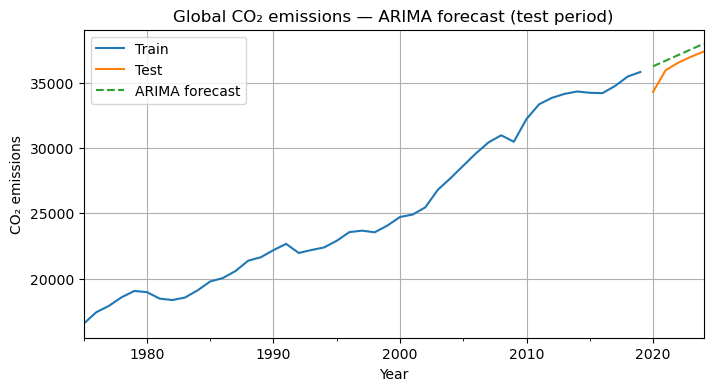

In [24]:
plt.figure(figsize=(8, 4))

train.plot(label="Train")
test.plot(label="Test")
forecast.plot(label="ARIMA forecast", linestyle="--")

plt.title("Global CO₂ emissions — ARIMA forecast (test period)")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Global GHG Modeling

global_ghg = (
    df.groupby("year")["total_ghg"]
      .sum(min_count=1)
      .sort_index()
)

global_ghg.index = pd.PeriodIndex(global_ghg.index, freq="Y")

In [26]:
print(global_ghg.head())
print(global_ghg.tail())

year
1975    30989.404072
1976    31943.415071
1977    33126.881679
1978    33801.326553
1979    33799.787126
Freq: Y-DEC, Name: total_ghg, dtype: float64
year
2020    50581.935385
2021    52620.404726
2022    53495.714831
2023    54072.705067
2024    54413.642137
Freq: Y-DEC, Name: total_ghg, dtype: float64


In [27]:
train = global_ghg.iloc[:-5]
test  = global_ghg.iloc[-5:]

In [28]:
naive_forecast = np.repeat(train.iloc[-1], len(test))

mae_naive = mean_absolute_error(test, naive_forecast)
rmse_naive = (mean_squared_error(test, naive_forecast)) ** 0.5

mae_naive, rmse_naive

(1273.5941046899184, 1453.2895086274534)

In [29]:
model = ARIMA(train, order=(1,1,1))
fit = model.fit()

forecast = fit.forecast(steps=len(test))
forecast.index = test.index

mae_arima = mean_absolute_error(test, forecast)
rmse_arima = (mean_squared_error(test, forecast)) ** 0.5

mae_arima, rmse_arima

global_ghg_fit = fit

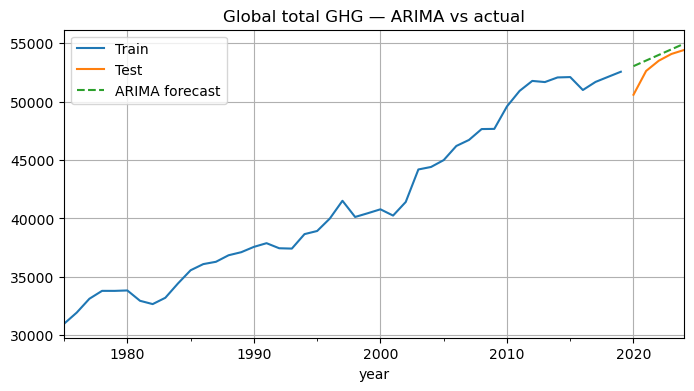

In [30]:
plt.figure(figsize=(8, 4))
train.plot(label="Train")
test.plot(label="Test")
forecast.plot(label="ARIMA forecast", linestyle="--")

plt.title("Global total GHG — ARIMA vs actual")
plt.legend()
plt.grid(True)
plt.show()

## Global-Level Results

Global CO₂ and total GHG models outperform naive baselines, indicating meaningful temporal structure in emissions dynamics.

## Country-Level Forecasts

ARIMA models are applied independently to each country.  
Country-level forecasts are limited to a 5-year horizon due to higher volatility and structural uncertainty.

In [32]:
selected_countries = [
    "Russia",
    "China",
    "India",
    "United States",
    "Germany",
    "Japan"
]

In [33]:
# Country CO2 Modeling

co2_country_models = {}
co2_failed_countries = []

for country in df["country"].unique():
    series = (
        df[df["country"] == country]
        .set_index("year")["co2"]
        .sort_index()
        .dropna()
    )

    if len(series) < 10:
        co2_failed_countries.append(country)
        continue

    try:
        series.index = pd.PeriodIndex(series.index, freq="Y")
        model = ARIMA(series, order=(1,1,1))
        fit = model.fit()

        # SAVE MODEL, NOT FORECAST
        co2_country_models[country] = fit

    except Exception:
        co2_failed_countries.append(country)

/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

In [34]:
print(len(co2_country_models), len(co2_failed_countries))

215 3


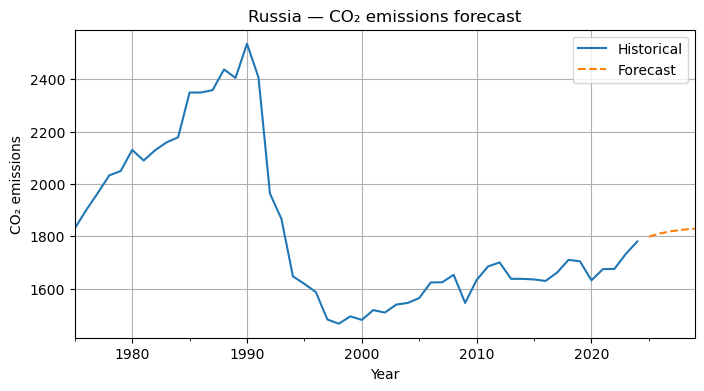

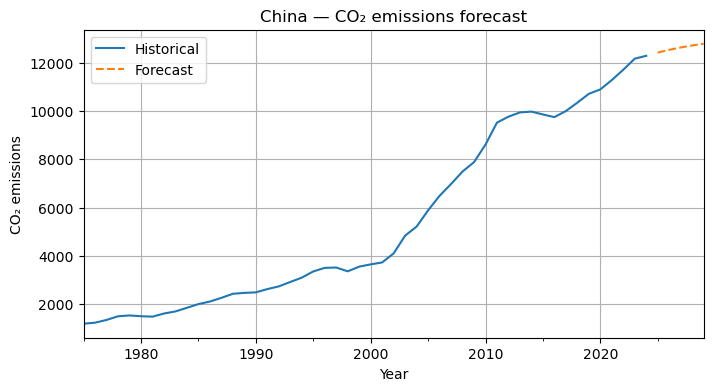

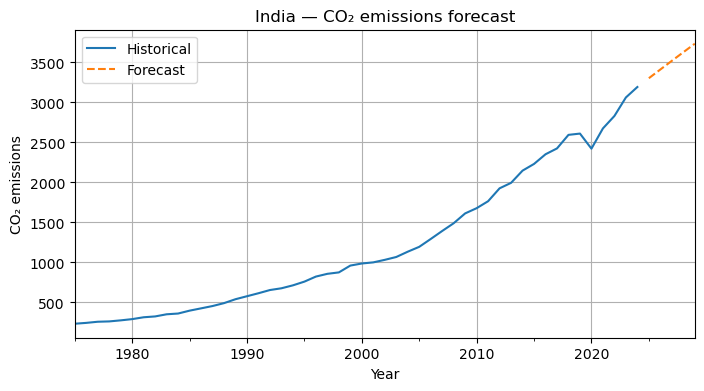

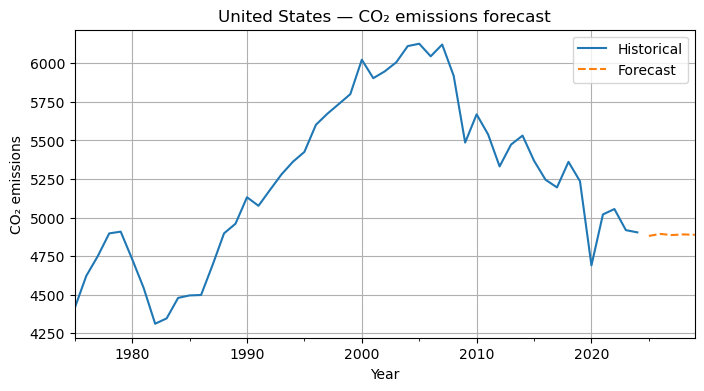

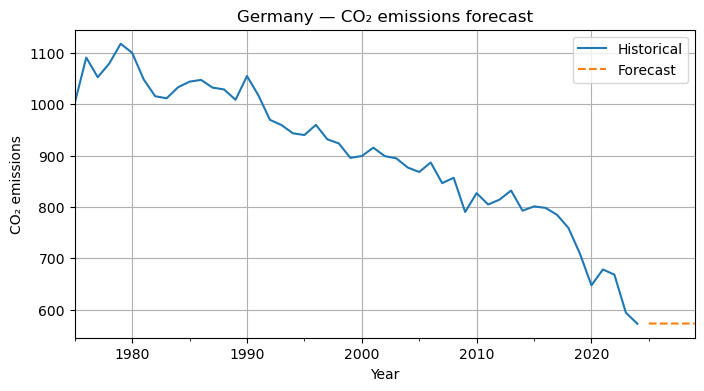

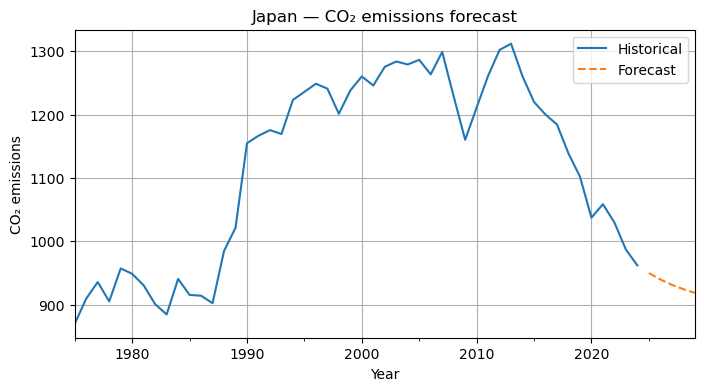

In [35]:
for country in selected_countries:
    if country not in co2_country_models:
        continue

    # Historical series
    series = (
        df[df["country"] == country]
        .set_index("year")["co2"]
        .dropna()
        .sort_index()
    )

    series.index = pd.PeriodIndex(series.index, freq="Y")

    # Forecast FROM MODEL
    model = co2_country_models[country]
    forecast = model.forecast(steps=5)

    plt.figure(figsize=(8,4))
    series.plot(label="Historical")
    forecast.plot(label="Forecast", linestyle="--")

    plt.title(f"{country} — CO₂ emissions forecast")
    plt.xlabel("Year")
    plt.ylabel("CO₂ emissions")
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
# Country GHG Modeling

ghg_country_models = {}
ghg_failed_countries = []

for country in df["country"].unique():
    series = (
        df[df["country"] == country]
        .set_index("year")["total_ghg"]
        .sort_index()
        .dropna()
    )

    if len(series) < 10:
        ghg_failed_countries.append(country)
        continue

    try:
        series.index = pd.PeriodIndex(series.index, freq="Y")
        model = ARIMA(series, order=(1,1,1))
        fit = model.fit()

        # SAVE MODEL, NOT FORECAST
        ghg_country_models[country] = fit

    except Exception:
        ghg_failed_countries.append(country)

/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/adityametkar/Desktop/anaconda/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

In [37]:
print(len(ghg_country_models), len(ghg_failed_countries))

199 19


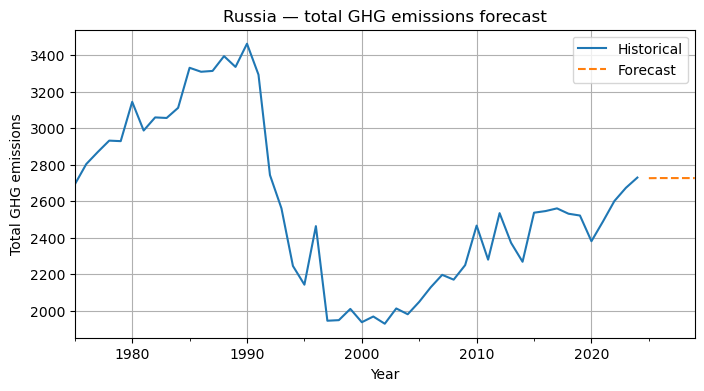

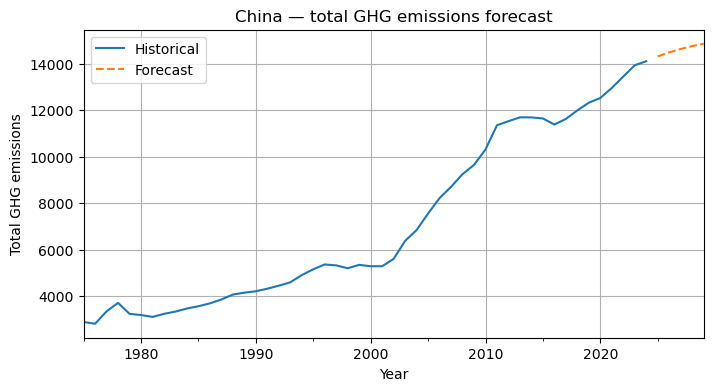

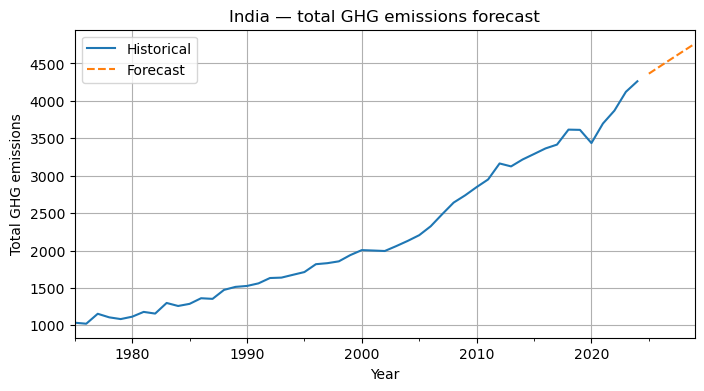

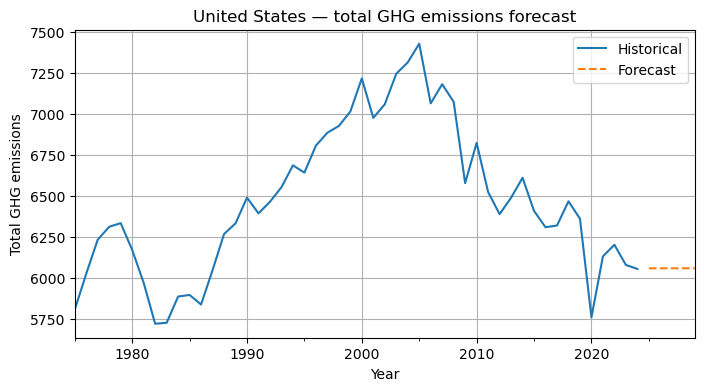

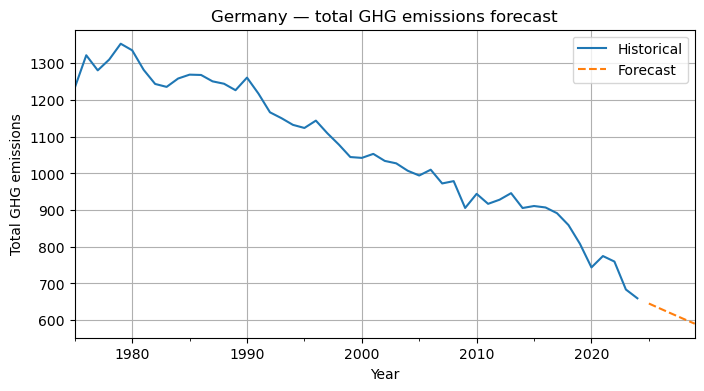

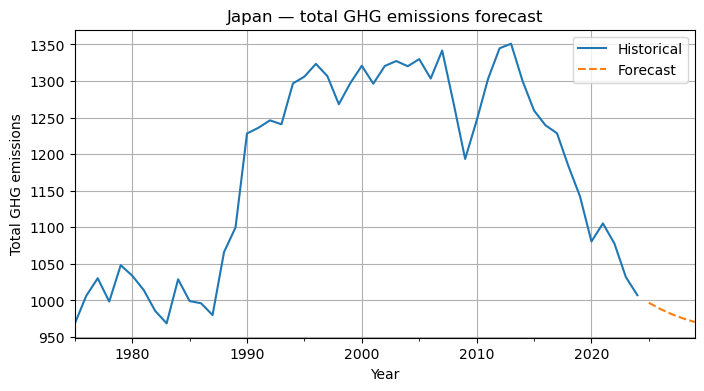

In [38]:
for country in selected_countries:
    if country not in ghg_country_models:
        continue

    series = (
        df[df["country"] == country]
        .set_index("year")["total_ghg"]
        .dropna()
        .sort_index()
    )

    series.index = pd.PeriodIndex(series.index, freq="Y")

    # Forecast FROM MODEL
    model = ghg_country_models[country]
    forecast = model.forecast(steps=5)

    plt.figure(figsize=(8,4))
    series.plot(label="Historical")
    forecast.plot(label="Forecast", linestyle="--")

    plt.title(f"{country} — total GHG emissions forecast")
    plt.xlabel("Year")
    plt.ylabel("Total GHG emissions")
    plt.legend()
    plt.grid(True)
    plt.show()

## Limitations and Conclusion

Country-level forecasts exhibit short-term fluctuations reflecting national-level volatility and structural breaks.  
Results should be interpreted as historical extrapolations rather than policy-driven projections.

In [39]:
# Saving the model
import joblib

# Save global models
joblib.dump(global_co2_fit, "global_co2_arima.joblib")
joblib.dump(global_ghg_fit, "global_ghg_arima.joblib")

# Save country-level models
joblib.dump(co2_country_models, "co2_country_models.joblib")
joblib.dump(ghg_country_models, "ghg_country_models.joblib")

['ghg_country_models.joblib']